### 1. Importing necessary libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
)
from utils.utils import plot_confusion_matrix, generate_tensor

### 2. Loading the dataset

In [14]:
dataset = pd.read_csv('../dataset/dataset.csv')

### 3. Preparing the images

In [15]:
test_df = dataset.sample(frac=1.0, random_state=42)

preprocess_input = tf.keras.applications.resnet.preprocess_input

In [16]:
test_data = generate_tensor(test_df, (227,227), image_channels=1, preprocess_input=preprocess_input)

Found 480 validated image filenames belonging to 2 classes.


### 4. Loading the ResNet50 model

In [17]:
model = tf.keras.models.load_model('./models/trained/resnet50_model.h5')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 233, 233, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 114, 114, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 114, 114, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

### 5. Making predictions

In [18]:
y_pred = np.argmax(model.predict(test_data), axis=1)

15/15 [==============================] - 40s 3s/step


In [19]:
x = f1_score(y_true=test_data.labels, y_pred=y_pred)
y = precision_score(y_true=test_data.labels, y_pred=y_pred)
z = recall_score(y_true=test_data.labels, y_pred=y_pred)

In [20]:
print(f'F1 Score: {round(x*100,2)}%')
print(f'Precision Score: {round(y*100,2)}%')
print(f'Recall Score: {round(z*100,2)}%')

F1 Score: 98.52%
Precision Score: 100.0%
Recall Score: 97.08%


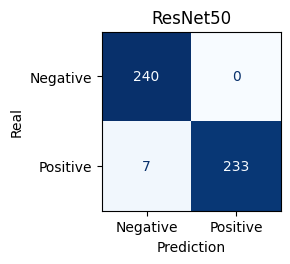

In [21]:
disp = plot_confusion_matrix(test_data.labels, y_pred, title = 'ResNet50')

plt.show()

In [22]:
disp.figure_.savefig('./models/figures/resnet50/resnet50_confusion_matrix.eps')
disp.figure_.savefig('./models/figures/resnet50/resnet50_confusion_matrix.png')

### 6. Evaluating the model

In [23]:
loss, acc = model.evaluate(test_data)

15/15 [==============================] - 42s 3s/step - loss: 0.0608 - accuracy: 0.9854


In [24]:
print(f'acc: {round(acc*100,2)}%')
print(f'loss: {loss}' )

acc: 98.54%
loss: 0.06084052100777626
